In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4

u'%.4f'

Data science is OSEMN
----

According to a popular model, the elements of data science are

- Obtaining data
- Scrubbing data
- Exploring data
- Modeling data
- iNterpreting data

and hence the acronym OSEMN, pronounced as "Awesome".

This lecture will review the O and S parts, often stated to consume between 50-80% of your time in a complex data analysis pipeline.

Obtaining data
----

Data may be generated from clinical trials, scientific experiments, surveys, web pages, computer simulations  etc. There are many ways that data can be stored, and part of the initial challenge is simply reading in the data so that it can be analysed.

### Remote data

**Alternatives using command line commandes**

In [2]:
! wget http://www.gutenberg.org/cache/epub/11/pg11.txt -O alice.txt

--2015-01-14 20:23:09--  http://www.gutenberg.org/cache/epub/11/pg11.txt
Resolving www.gutenberg.org... 152.19.134.47, 152.19.134.47
Connecting to www.gutenberg.org|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167518 (164K) [text/plain]
Saving to: ‘alice.txt’

100%[======================================>] 167,518      677KB/s   in 0.2s   

2015-01-14 20:23:11 (677 KB/s) - ‘alice.txt’ saved [167518/167518]



In [3]:
! curl http://www.gutenberg.org/cache/epub/11/pg11.txt > alice.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  163k  100  163k    0     0   416k      0 --:--:-- --:--:-- --:--:--     0 --:--:-- --:--:-- --:--:--  418k


**Alternatives Using Python**

In [4]:
import urllib2
text = urllib2.urlopen('http://www.gutenberg.org/cache/epub/11/pg11.txt').read()

In [5]:
import requests
test = requests.get('http://www.gutenberg.org/cache/epub/11/pg11.txt').text

### Plain text files

We can open plain text files with the `open` function. This is a common and very flexible format, but because no structure is involved, custom processing methods to extract the information needed may be necessary.

**Example 1**: Suppose we want to find out how often the words alice and drink occur in the same sentence in Alice in Wonderland.

In [6]:
# We first need to get the book from Project Gutenburg

import os
if not os.path.exists('alice.txt'):
    ! wget http://www.gutenberg.org/cache/epub/11/pg11.txt -O alice.txt

In [7]:
# now read the book into memory, clean out blank lines and convert to lowercase
alice = open('alice.txt', 'r').read().replace('\r\n', ' ').lower()

In [8]:
# split into sentence
# simplistically assume that every sentence ends with a '.', '?' or '!'
import re

stop_pattern = '\.|\?|\!'
sentences = re.split(stop_pattern, alice)

In [9]:
# find sentences that contain both 'alice' and 'drink'

print

for i, sentence in enumerate(sentences):
    if 'alice' in sentence and 'drink' in sentence:
        print i, sentence, '\n'


66   there seemed to be no use in waiting by the little door, so she went back to the table, half hoping she might find another key on it, or at any rate a book of rules for shutting people up like telescopes: this time she found a little bottle on it, ('which certainly was not here before,' said alice,) and round the neck of the bottle was a paper label, with the words 'drink me' beautifully printed on it in large letters 

67   it was all very well to say 'drink me,' but the wise little alice was not going to do that in a hurry 

469  alice looked all round her at the flowers and the blades of grass, but she did not see anything that looked like the right thing to eat or drink under the circumstances 

882 ' said alice, who always took a great interest in questions of eating and drinking 



### Delimited files

Plain text files can also have a delimited structure - basically a table with rows and columns, where eacy column is separated by some separator, commonly a comma (CSV) or tab. There may or may not be additional comments or a header row in the file.

In [10]:
%%file example.csv
# This is a comment
# This is another comment
alice,60,1.56
bob,72,1.75
david,84,1.82

Overwriting example.csv


In [11]:
# Using line by line parsing
import csv

with open('example.csv') as f:
    # use a generator expression to strip out comments
    for line in csv.reader(row for row in f if not row.startswith('#')):
        name, wt, ht = line
        wt, ht = map(float, (wt, ht))
        print 'BMI of %s = %.2f' % (name, wt/(ht*ht))

BMI of alice = 24.65
BMI of bob = 23.51
BMI of david = 25.36


In [12]:
# Often it is most convenient to read it into a Pandas dataframe

import pandas as pd

df = pd.read_csv('example.csv', comment='#', header=None)
df.columns = ['name', 'wt', 'ht']
df['bmi'] = df['wt']/(df['ht']*df['ht'])
df

name  wt    ht        bmi
0  alice  60  1.56  24.654832
1    bob  72  1.75  23.510204
2  david  84  1.82  25.359256

### JSON files

JSON is JavaScript Object Notation - a format used widely for web-based resource sharing. It is very similar in structure to a Python nested dictionary. Here is an example from http://json.org/example

In [13]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
		"GlossDiv": {
            "title": "S",
			"GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
					"SortAs": "SGML",
					"GlossTerm": "Standard Generalized Markup Language",
					"Acronym": "SGML",
					"Abbrev": "ISO 8879:1986",
					"GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
						"GlossSeeAlso": ["GML", "XML"]
                    },
					"GlossSee": "markup"
                }
            }
        }
    }
}

Overwriting example.json


In [14]:
import json
data = json.load(open('example.json'))

In [15]:
# data is a nested Python dictionary
data

{u'glossary': {u'GlossDiv': {u'GlossList': {u'GlossEntry': {u'Abbrev': u'ISO 8879:1986',
     u'Acronym': u'SGML',
     u'GlossDef': {u'GlossSeeAlso': [u'GML', u'XML'],
      u'para': u'A meta-markup language, used to create markup languages such as DocBook.'},
     u'GlossSee': u'markup',
     u'GlossTerm': u'Standard Generalized Markup Language',
     u'ID': u'SGML',
     u'SortAs': u'SGML'}},
   u'title': u'S'},
  u'title': u'example glossary'}}

In [16]:
# and can be parsed using standard key lookups
data['glossary']['GlossDiv']['GlossList']

{u'GlossEntry': {u'Abbrev': u'ISO 8879:1986',
  u'Acronym': u'SGML',
  u'GlossDef': {u'GlossSeeAlso': [u'GML', u'XML'],
   u'para': u'A meta-markup language, used to create markup languages such as DocBook.'},
  u'GlossSee': u'markup',
  u'GlossTerm': u'Standard Generalized Markup Language',
  u'ID': u'SGML',
  u'SortAs': u'SGML'}}

### Web scraping

Sometimes we want to get data from a web page that does not provide an API to do so programmatically. In such cases, we have to resort to *web scraping*.

In [17]:
!pip install Scrapy

Cleaning up...


In [18]:
if os.path.exists('dmoz'):
    %rm -rf dmoz
! scrapy startproject dmoz

New Scrapy project 'dmoz' created in:
    /Users/cliburn/git/STA663-2015/Lectures/Topic03_Data_Munging/dmoz

You can start your first spider with:
    cd dmoz
    scrapy genspider example example.com


In [19]:
%%file dmoz/dmoz/items.py
import scrapy

class DmozItem(scrapy.Item):
    title = scrapy.Field()
    link = scrapy.Field()
    desc = scrapy.Field()

Overwriting dmoz/dmoz/items.py


In [20]:
%%file dmoz/dmoz/spiders/dmoz_spider.py
import scrapy

from dmoz.items import DmozItem

class DmozSpider(scrapy.Spider):
    name = "dmoz"
    allowed_domains = ["dmoz.org"]
    start_urls = [
        "http://www.dmoz.org/Computers/Programming/Languages/Python/Books/",
        "http://www.dmoz.org/Computers/Programming/Languages/Python/Resources/"
    ]

    def parse(self, response):
        for sel in response.xpath('//ul/li'):
            item = DmozItem()
            item['title'] = sel.xpath('a/text()').extract()
            item['link'] = sel.xpath('a/@href').extract()
            item['desc'] = sel.xpath('text()').extract()
            yield item

Writing dmoz/dmoz/spiders/dmoz_spider.py


In [21]:
%%bash
cd dmoz
scrapy crawl dmoz --nolog -o scraped_data.json

In [22]:
dmoz = json.load(open('dmoz/scraped_data.json'))
for item in dmoz:
    if item['title'] and item['link']:
        if item['link'][0].startswith('http'):
            print '%s: %s' % (item['title'][0], item['link'][0])

eff-bot's Daily Python URL: http://www.pythonware.com/daily/
Free Python and Zope Hosting Directory: http://www.oinko.net/freepython/
O'Reilly Python Center: http://oreilly.com/python/
Python Developer's Guide: https://www.python.org/dev/
Social Bug: http://win32com.goermezer.de/
Core Python Programming: http://www.pearsonhighered.com/educator/academic/product/0,,0130260363,00%2Ben-USS_01DBC.html
Data Structures and Algorithms with Object-Oriented Design Patterns in Python: http://www.brpreiss.com/books/opus7/html/book.html
Dive Into Python 3: http://www.diveintopython.net/
Foundations of Python Network Programming: http://rhodesmill.org/brandon/2011/foundations-of-python-network-programming/
Free Python books: http://www.techbooksforfree.com/perlpython.shtml
FreeTechBooks: Python Scripting Language: http://www.freetechbooks.com/python-f6.html
How to Think Like a Computer Scientist: Learning with Python: http://greenteapress.com/thinkpython/
An Introduction to Python: http://www.networ

### HDF5

HDF5 is a hierarchical format often used to store complex scientific data. For instance, Matlab now saves its data to HDF5. It is particularly useful to store complex hierarchical data sets with associated metadata, for example, the results of a computer simulation experiment.

The main concepts associated with HDF5 are 

- file: container for hierachical data - serves as 'root' for tree
- group: a node for a tree
- dataset: array for numeric data - can be huge
- attribute: small pieces of metadata that provide additional context

In [23]:
import h5py
import numpy as np

In [24]:
# creating a HDF5 file
import datetime

if not os.path.exists('example.hdf5'):

    with h5py.File('example.hdf5') as f:
        project = f.create_group('project')
        project.attrs.create('name', 'My project')
        project.attrs.create('date', str(datetime.date.today()))

        expt1 = project.create_group('expt1')
        expt2 = project.create_group('expt2')
        expt1.create_dataset('counts', (100,), dtype='i')
        expt2.create_dataset('values', (1000,), dtype='f')

        expt1['counts'][:] = range(100)
        expt2['values'][:] = np.random.random(1000)

In [25]:
with h5py.File('example.hdf5') as f:
    project = f['project']
    print project.attrs['name']
    print project.attrs['date']
    print project['expt1']['counts'][:10]
    print project['expt2']['values'][:10]

My project
2014-12-17
[0 1 2 3 4 5 6 7 8 9]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### Relational databases

Relational databases are comprised of tables, where each row consists of a tuple of columns. Each row is uniquely identified by a *primary key*, and tables can be linked via *foreign keys*.

We will illustrate the concepts of table querying the [Chinook database](http://chinookdatabase.codeplex.com/). From the online description, "The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers."

In [26]:
from IPython.display import Image

Image(url='http://lh4.ggpht.com/_oKo6zFhdD98/SWFPtyfHJFI/AAAAAAAAAMc/GdrlzeBNsZM/s800/ChinookDatabaseSchema1.1.png')

In [27]:
import sqlite3

# first connect to database and get a cursor for executing commands
conn = sqlite3.connect('Chinook.db')
cr = conn.cursor()

In [28]:
# What tables are in the database?
cr.execute("select name from sqlite_master where type = 'table';")
print cr.fetchall()

[(u'Album',), (u'Artist',), (u'Customer',), (u'Employee',), (u'Genre',), (u'Invoice',), (u'InvoiceLine',), (u'MediaType',), (u'Playlist',), (u'PlaylistTrack',), (u'Track',)]


In [29]:
# What is the structure of the Album table?
cr.execute("select sql from sqlite_master where type = 'table' and name = 'Album';" )
print cr.fetchone()[0]

CREATE TABLE [Album]
(
    [AlbumId] INTEGER  NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),
    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)


In [30]:
# What is the structure of the Artist table?
cr.execute("select sql from sqlite_master where type = 'table' and name = 'Artist';" )
print cr.fetchone()[0]

CREATE TABLE [Artist]
(
    [ArtistId] INTEGER  NOT NULL,
    [Name] NVARCHAR(120),
    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])
)


In [31]:
# List a few items
cr.execute("select * from Album limit 6")
cr.fetchall()

[(1, u'For Those About To Rock We Salute You', 1),
 (2, u'Balls to the Wall', 2),
 (3, u'Restless and Wild', 2),
 (4, u'Let There Be Rock', 1),
 (5, u'Big Ones', 3),
 (6, u'Jagged Little Pill', 4)]

In [32]:
# find the artist who performed on the Album 'Big Ones'
cmd = """
select Artist.Name from Artist, Album 
where Artist.ArtistId = Album.ArtistId
and Album.Title = 'Big Ones';
"""
cr.execute(cmd)
cr.fetchall()

[(u'Aerosmith',)]

In [33]:
# clean up
cr.close()
conn.close()

Scrubbing data
----

Scrubbing data refers to the preprocessing needed to prepare data for analysis. This may involve removing particular rows or columns, handling missing data, fixing inconsistencies due to data entry errors, transforming dates, generating derived variables, combining data from multiple sources, etc. Unfortunately, there is no one method that can handle all of the posisble data preprocessing needs; however, some familiarity with Python and packages such as those illustrated above will go a long way.

For a real-life example of the amount of work required, see the [Bureau of Labor Statistics (US Government)](http://okfnlabs.org/bad-data/ex/bls-us-employment/) example.

Here we will illustrate some simple data cleaning tasks that can be done with `pandas`.

In [34]:
%%file bad_data.csv
# This is a comment
# This is another comment
name,gender,weight,height
alice,f,60,1.56
bob,m,72,1.75
charles,m,,91
david,m,84,1.82
edgar,m,1.77,93
fanny,f,45,1.45

Overwriting bad_data.csv


In [35]:
# Supppose we wanted to find the average Body Mass Index (BMI) 
# from the data set above

import pandas as pd

df = pd.read_csv('bad_data.csv', comment='#')

In [36]:
df.describe()

weight     height
count   5.000000   6.000000
mean   52.554000  31.763333
std    31.853251  46.663594
min     1.770000   1.450000
25%    45.000000   1.607500
50%    60.000000   1.785000
75%    72.000000  68.705000
max    84.000000  93.000000

Something is strange - the average height is 31 meters!

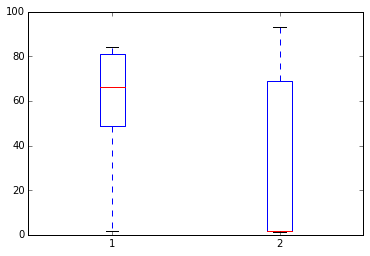

In [37]:
# Plot the height and weight to see
plt.boxplot([df.weight, df.height]),;

In [38]:
df[df.height > 2]

name gender  weight  height
2  charles      m     NaN      91
4    edgar      m    1.77      93

In [39]:
# weight and height appear to have been swapped
# so we'll swap them back
idx = df.height > 2
df.ix[idx, 'height'], df.ix[idx, 'weight'] = df.ix[idx, 'weight'], df.ix[idx, 'height']
df[df.height > 2]

Empty DataFrame
Columns: [name, gender, weight, height]
Index: []

In [40]:
df

name gender  weight  height
0    alice      f      60    1.56
1      bob      m      72    1.75
2  charles      m      91     NaN
3    david      m      84    1.82
4    edgar      m      93    1.77
5    fanny      f      45    1.45

In [41]:
# we migth want to impute the missing height
# perhaps by predicting it from a model of the relationship
# bewtween height, weight and gender
# but for now we'll just ignore rows with mising data

df['BMI'] = df['weight']/(df['height']*df['height'])
df

name gender  weight  height        BMI
0    alice      f      60    1.56  24.654832
1      bob      m      72    1.75  23.510204
2  charles      m      91     NaN        NaN
3    david      m      84    1.82  25.359256
4    edgar      m      93    1.77  29.684956
5    fanny      f      45    1.45  21.403092

In [42]:
# And finally, we calcuate the mean BMI by gender
df.groupby('gender')['BMI'].mean()

gender
f         23.028962
m         26.184806
Name: BMI, dtype: float64

<font color=red>Exercises</font>
----

**1**. Write the following sentences to a file "hello.txt" using `open` and `write`. There should be 3 lines in the resulting file.
```
Hello, world.
Goodbye, cruel world.
The world is your oyster.
```

In [43]:
# YOUR CODE HERE

s = """Hello, world.
Goodbye, cruel world.
The world is your oyster.
"""

with open('hello.txt', 'w') as f:
    f.write(s)

In [44]:
! cat hello.txt

Hello, world.
Goodbye, cruel world.
The world is your oyster.


**2**. Using a `for` loop and `open`, print only the lines from the file 'hello.txt' that begin wtih 'Hello' or 'The'.

In [45]:
# YOUR CODE HERE

for line in open('hello.txt'):
    if line.startswith('Hello') or line.startswith('The'):
        print line,

Hello, world.
The world is your oyster.


**3**. Most of the time, tabular files can be read corectly using convenience functions from pandas. Sometimes, however, line-by-line processing of a file is unavoidable, typically when the file originated from an Excel spreadsheet. Use the `csv` module and a `for` loop to create a pandas DataFrame for the file `ugh.csv`.

In [46]:
%%file ugh.csv
# This is a comment
# This is another comment
name,weight,height
alice, 60,1.56
bob,72,1.75
david,84,   1.82

pooh,314.2,1.4
# eeyore should be here but didn't come for follow up
rabbit, 1.2,0.6
"king Rameses, the third",85,1.82

Notes: weight is in kg 
Note: height is in meters

Overwriting ugh.csv


In [56]:
# The cleaned table should look like this
import pandas as pd
pd.read_csv('clean_ugh.csv')

name  weight  height
0                    alice    60.0    1.56
1                      bob    72.0    1.75
2                    david    84.0    1.82
3                     pooh   314.2    1.40
4                   rabbit     1.2    0.60
5  king Rameses, the third    85.0    1.82

In [57]:
# YOUR CODE HERE


haader = None
rows = []
with open('ugh.csv') as f:
    for i, line in enumerate(csv.reader(
        row for row in f if not row.startswith('#') and 
                            not row.startswith('Note') and
                            row.strip())):
        if i== 0:
            header = line
        else:
            rows.append(line)
    
df = pd.DataFrame(rows, columns=header) 
df[['weight', 'height']] = df[['weight', 'height']].astype('float')
df

name  weight  height
0                    alice    60.0    1.56
1                      bob    72.0    1.75
2                    david    84.0    1.82
3                     pooh   314.2    1.40
4                   rabbit     1.2    0.60
5  king Rameses, the third    85.0    1.82

**4**. Given the HDF5 file 'mystery.hdf5', plot a histogram of the `events` dataset in the subgroup `expt` of `simulation`. Give the plot a title of 'name (date)' where name and date are attributes of the `simulation` group.

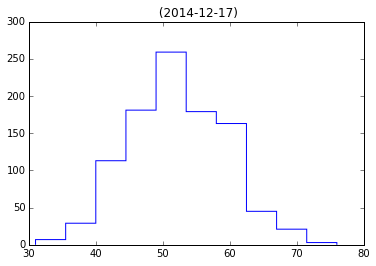

In [69]:
# YOUR CODE HERE

with h5py.File('mystery.hdf5') as f:
    events = f['simulation']['expt']['events'][:]
    name = f['simulation'].attrs['name']
    date = f['simulation'].attrs['date']

plt.hist(events, histtype='step')
plt.title('%s (%s)' % (name, date))# note name is empty

**5**. Make a table of the top 10 artists who have the most number of tracks in the SQLite3 database "Chinook.db". Since you wil take some time to master the arcana of SQL syntax, a template is provided for the SQL query. All you have to do is fill in the X's. This may require some Googling to figure out what the syntax means. It is also helpful to refer to the "Chinook.db" schema shown below.

In [50]:
from IPython.display import Image

Image(url='http://lh4.ggpht.com/_oKo6zFhdD98/SWFPtyfHJFI/AAAAAAAAAMc/GdrlzeBNsZM/s800/ChinookDatabaseSchema1.1.png')

In [85]:
# YOUR CODE HERE

sql = """
select Artist.name, count(Track.Name) as total
from Artist, Album, Track
where Artist.ArtistId = Album.ArtistId and Album.AlbumId = Track.AlbumId
group by Artist.name
order by total desc 
limit 10;
"""

with sqlite3.connect('Chinook.db') as conn:
    cr = conn.cursor()
    cr.execute(sql)
    for row in cr.fetchall():
        print row

(u'Iron Maiden', 213)
(u'U2', 135)
(u'Led Zeppelin', 114)
(u'Metallica', 112)
(u'Deep Purple', 92)
(u'Lost', 92)
(u'Pearl Jam', 67)
(u'Lenny Kravitz', 57)
(u'Various Artists', 56)
(u'The Office', 53)
